## Momentum 

----------------------------------------
### 1. Theory 


Trong khi SGD là một chiến lược Optimization phổ biến, tuy nhiên việc học với nó đôi khi có thể chậm. Phương pháp Momentum được thiết kế để tăng tốc độ học tập. Momentum tích lũy một trung bình động giảm dần theo cấp số nhân của Gradient trong quá khứ và tiếp tục di chuyển theo hướng đó.

Momentum giới thiệu một biến v - vận tốc (hướng và tốc độ) của các tham số trong quá trình đi đến vị trí tối ưu:

$$v = \alpha v - \epsilon\theta(\frac{1}{m}\sum_{i = 1}^m L(f(x^{(i)};\theta),y^{(i)}))$$

$$\theta = \theta + v $$

trong $\alpha \in [0,1)$ xác định sự đóng góp của các gradient trc đó phân rã nhanh như nào

Momentum sinh ra nhằm mục đích chú yếu là:
* Poor Conditioning của Hessian matrix 

    * Khỉ một ma trận Hessian (đạo hàm của gradient) kém có nghĩa là hàm tổn thất có dạng thung lũng hoặc hẻm núi. Gradient sẽ lãng phí thời gian khi di chuyển qua lại trên các trục hẹp trong khi động lượng chính xác để đi qua hẻm núi là theo chiều dọc. Momentum thực hiện điều này bằng cách thêm trung bình có trọng số của các gradient trước đó vào gradient hiện tại từ đó có "đà" để vượt qua các minimum local 
* Variance trong SGD do phải chọn 1 hoặc tập con trong tập train


-------------------------------------

* Algorithms 8.2: 
    * Require: Learning rate $\epsilon$ và momentum parameter $\alpha$ 
    
    * Require: Init $\theta$ và vận tốc $v$

        * <b>while</b> (chưa gặp điều kiện dừng) <b>do</b>
        
        $$x = \{ x^{(1)},...,x^{(m)}\} $$ 
        $$y = \{y^{(1)} , ..., y^{(m)}\} $$
        $$g = \frac{1}{m}\nabla_\theta\sum_{i = 1}L()$$
        $$v = \alpha v - \epsilon g$$
        $$\theta = \theta + v $$

         *   end

-----------------------------------------------

### 2. Code 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [55]:
def f(x): 
    return x**4 - 12*x**3 + 100*x

In [58]:
def dev_f(x):
    return 4*x**3 - 36*x**2 + 100 

In [119]:
def gd(epochs,lr):
    i = np.linspace(-5,12,1000)
    plt.plot(i,f(i))    
    x = -5
    for i in range(epochs):
        x = x - lr *  dev_f(x) 
        plt.plot(x, f(x), marker='o', color='red') # Vẽ điểm đỏ tại giá trị mới của x



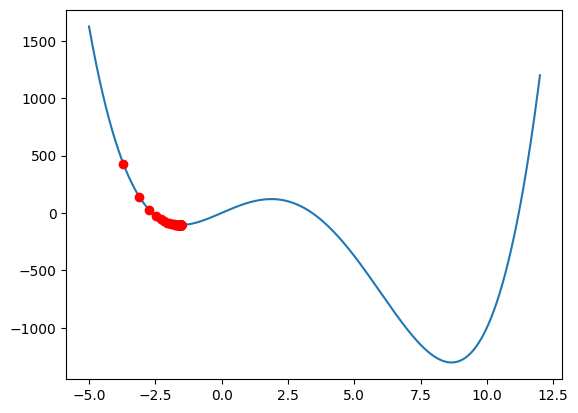

In [120]:
gd(100,0.001)

* Có thể thấy nếu khởi tạo trọng số ở gần local minimum thì sẽ dễ bị kẹt tại đây nếu không sử dụng momentum

In [159]:
def gd_momen(epochs,alpha = 0.9,epsilon = 0.001):
    i = np.linspace(-5,12,1000)
    plt.plot(i,f(i))
    x = -5
    v = 0
    for i in range(epochs):
        gra = dev_f(x) 
        v = alpha* v - epsilon * gra 
        x = x + v 
        plt.plot(x, f(x), marker='o', color='red')
        print(f(x))
        

425.25210000000004
-92.56868095509837
-27.91991498807142
96.00470198722729
112.04798361041529
0.2292545451993533
-252.8230073505659
-658.8685460999699
-1124.959927662746
-1285.1725558925991


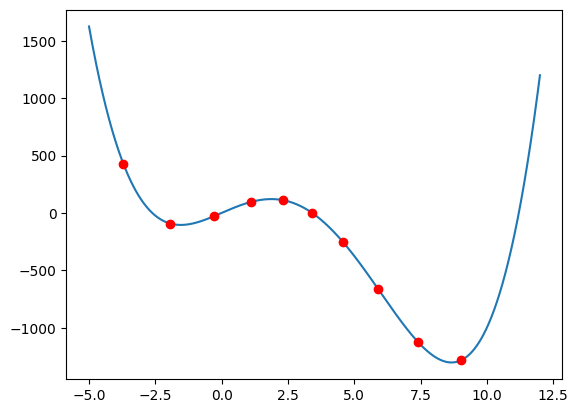

In [160]:
gd_momen(10)

* Sau khi có momentum -> vừa hội tụ nhanh hơn(chỉ cần 10 epochs) lại ko bị kẹt bởi local - minimum